In [40]:
import keras
import cv2
from skimage.transform import rotate, resize, SimilarityTransform, warp
import os
import itertools
import numpy as np
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.utils.training_utils import multi_gpu_model
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score
from sklearn.metrics import average_precision_score, confusion_matrix
%matplotlib inline

In [41]:
MODEL_PATH = "./binary_classifier/net_2_model.h5"

In [43]:
model = keras.models.load_model(MODEL_PATH)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 92, 92, 8)         608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 5)         365       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 5)         230       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 5)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 10)          460       
__________

In [44]:
# Build model

model2 = Sequential()
# First layer
model2.add(Convolution2D(8, (5, 5), activation='relu', padding='valid', input_shape=(None, None, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second layer
model2.add(Convolution2D(5, (3, 3), activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Third layer
model2.add(Convolution2D(5, (3, 3), activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth layer
model2.add(Convolution2D(10, (3, 3), activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Convolution2D(2, (4, 4), activation='softmax', padding='valid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, None, None, 8)     608       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, None, None, 8)     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, None, None, 5)     365       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, None, None, 5)     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, None, None, 5)     230       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, None, None, 5)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, None, None, 10)    460       
__________

In [45]:
model2.layers[0].set_weights(model.layers[0].get_weights())
model2.layers[2].set_weights(model.layers[2].get_weights())
model2.layers[4].set_weights(model.layers[4].get_weights())
model2.layers[6].set_weights(model.layers[6].get_weights())
first = model.layers[9].get_weights()[0].reshape(4, 4, 10, 2)
second = model.layers[9].get_weights()[1]
model2.layers[8].set_weights([first, second])

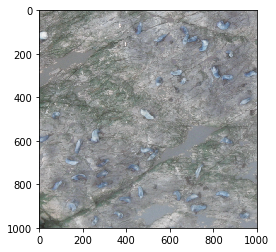

In [57]:
#image = cv2.cvtColor(cv2.imread("./kaggle_sea_lions/Train/905.jpg"), cv2.COLOR_BGR2RGB)
image = cv2.imread("./kaggle_sea_lions/Train/905.jpg")
image = image[1000:2000, 1000:2000]
plt.imshow(image)

(57, 57)


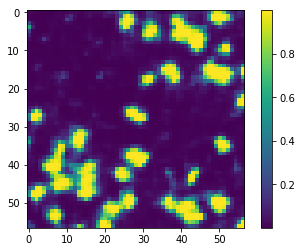

In [59]:
r = model2.predict((image.reshape(1, image.shape[0], image.shape[1], image.shape[2]))/255)
hm = r[0, :, :, 0]
print(np.shape(hm))
#plt.imshow(hm)
plt.imshow(cv2.resize(hm, dsize=(image.shape[0], image.shape[1]), interpolation=cv2.INTER_CUBIC))
plt.colorbar()
plt.show()
